# 서울시 공유자전거 '따릉이' 수요 예측 프로젝트
## 단계1. 데이터 전처리

## 0.프로젝트 소개

### (1) 수행 목표 
여러분은 서울시 정책 연구원으로써 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

#### 우리가 풀어야 하는 문제는 무엇인가요?

 - 기상상황이 따릉이 수요에 주는 영향을 분석해봅시다.

    * 1.데이터를 탐색하며 정보 획득
        * 날씨 데이터와 서울시 공유 자전거 따릉이의 수요 데이터를 제공해드렸습니다. 
        * 우리는 따릉이의 수요와 날씨간 어떤 연관성이 있는지 탐색 해 봅시다.
    * 2.EDA
        * 주어진 데이터의 변수들을 분석해 봅시다. 


### (2) 데이터 소개

#### 1) 기본 데이터

        * 학습데이터 : sbikedata.csv

#### 2) 데이터셋의 변수 소개

        * date : 날짜
        * hour : 시간
        * temperature : 온도
        * precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
        * windspeed : 풍속(평균)
        * humidity : 습도
        * visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미) (10m)
        * ozone : 오존 수치
        * PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
        * PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
        * count : 시간에 따른 따릉이 대여 수


## 1.환경설정

* 세부 요구사항
    - 경로 설정 
        * 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정 및 라이브러리 로딩
* 이번 프로젝트는 로컬환경에서 진행합니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# path = 'C:/Users/User/'

#### 2) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



### (2) 데이터 불러오기
* 주어진 데이터셋
    * 따릉이 수요 및 날씨 데이터 : sbikedata.csv

#### 1) 데이터로딩

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sbikedata = pd.read_csv('sbikedata.csv')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sbikedata.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sbikedata.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

sbikedata.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,5827.0,11.506607,6.921963,0.000,6.000,12.000,18.000,23.000
PM10,5725.0,31.970655,42.987292,3.000,16.000,25.000,37.000,827.000
PM2.5,5732.0,15.666609,13.850990,1.000,7.000,13.000,20.000,125.000
ozone,5699.0,0.031811,0.018277,0.001,0.019,0.031,0.041,0.137
temperature,5827.0,19.376798,7.501572,-3.500,14.100,20.400,24.900,36.300
precipitation,5827.0,0.075511,0.264236,0.000,0.000,0.000,0.000,1.000
windspeed,5827.0,2.237601,1.054516,0.000,1.500,2.200,2.800,8.300
humidity,5827.0,68.608718,17.277266,19.000,56.000,70.000,82.000,100.000
visibility,5827.0,1758.438648,490.969394,60.000,1935.500,2000.000,2000.000,2000.000
count,5827.0,215.117899,185.972900,1.000,53.000,186.000,315.000,1746.000


In [54]:
date = pd.to_datetime(sbikedata['date'])
sbikedata['month'] = date.dt.month
sbikedata['weekday'] = date.dt.weekday

In [55]:
sbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5725 non-null   float64
 3   PM2.5          5732 non-null   float64
 4   ozone          5699 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
 11  month          5827 non-null   int32  
 12  weekday        5827 non-null   int32  
dtypes: float64(5), int32(2), int64(5), object(1)
memory usage: 546.4+ KB


In [56]:
sbikedata.isna().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
month              0
weekday            0
dtype: int64

In [57]:
num_features = list(sbikedata)[1:]

sbikedata[num_features] = sbikedata[num_features].fillna(sbikedata[num_features].median())

sbikedata.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
month            0
weekday          0
dtype: int64

In [58]:
sbikedata.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,month,weekday
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,4,3
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,4,3
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,4,3
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,4,3
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,4,3


In [61]:
sbikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
 11  month          5827 non-null   int32  
 12  weekday        5827 non-null   int32  
dtypes: float64(5), int32(2), int64(5), object(1)
memory usage: 546.4+ KB


In [60]:
sbikedata.to_csv("sbikedata_process.csv", index=False)

## 2.EDA 1단계 - 데이터 기본 탐색

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 수치형 변수들 단변량 분석

In [66]:
def eda_1_num(data, var_list, bins = 30):

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (12,36))
        
    for i in range(len(var_list)):
        plt.subplot(10, 2, (2*i) + 1)
        sns.histplot(data[var_list[i]], bins = bins, kde = True)
        plt.grid()

        plt.subplot(10, 2, (2*i) + 2)
        sns.boxplot(x = data[var_list[i]])
        plt.grid()
        
    plt.tight_layout()
    plt.show()

<< 그래프 >>


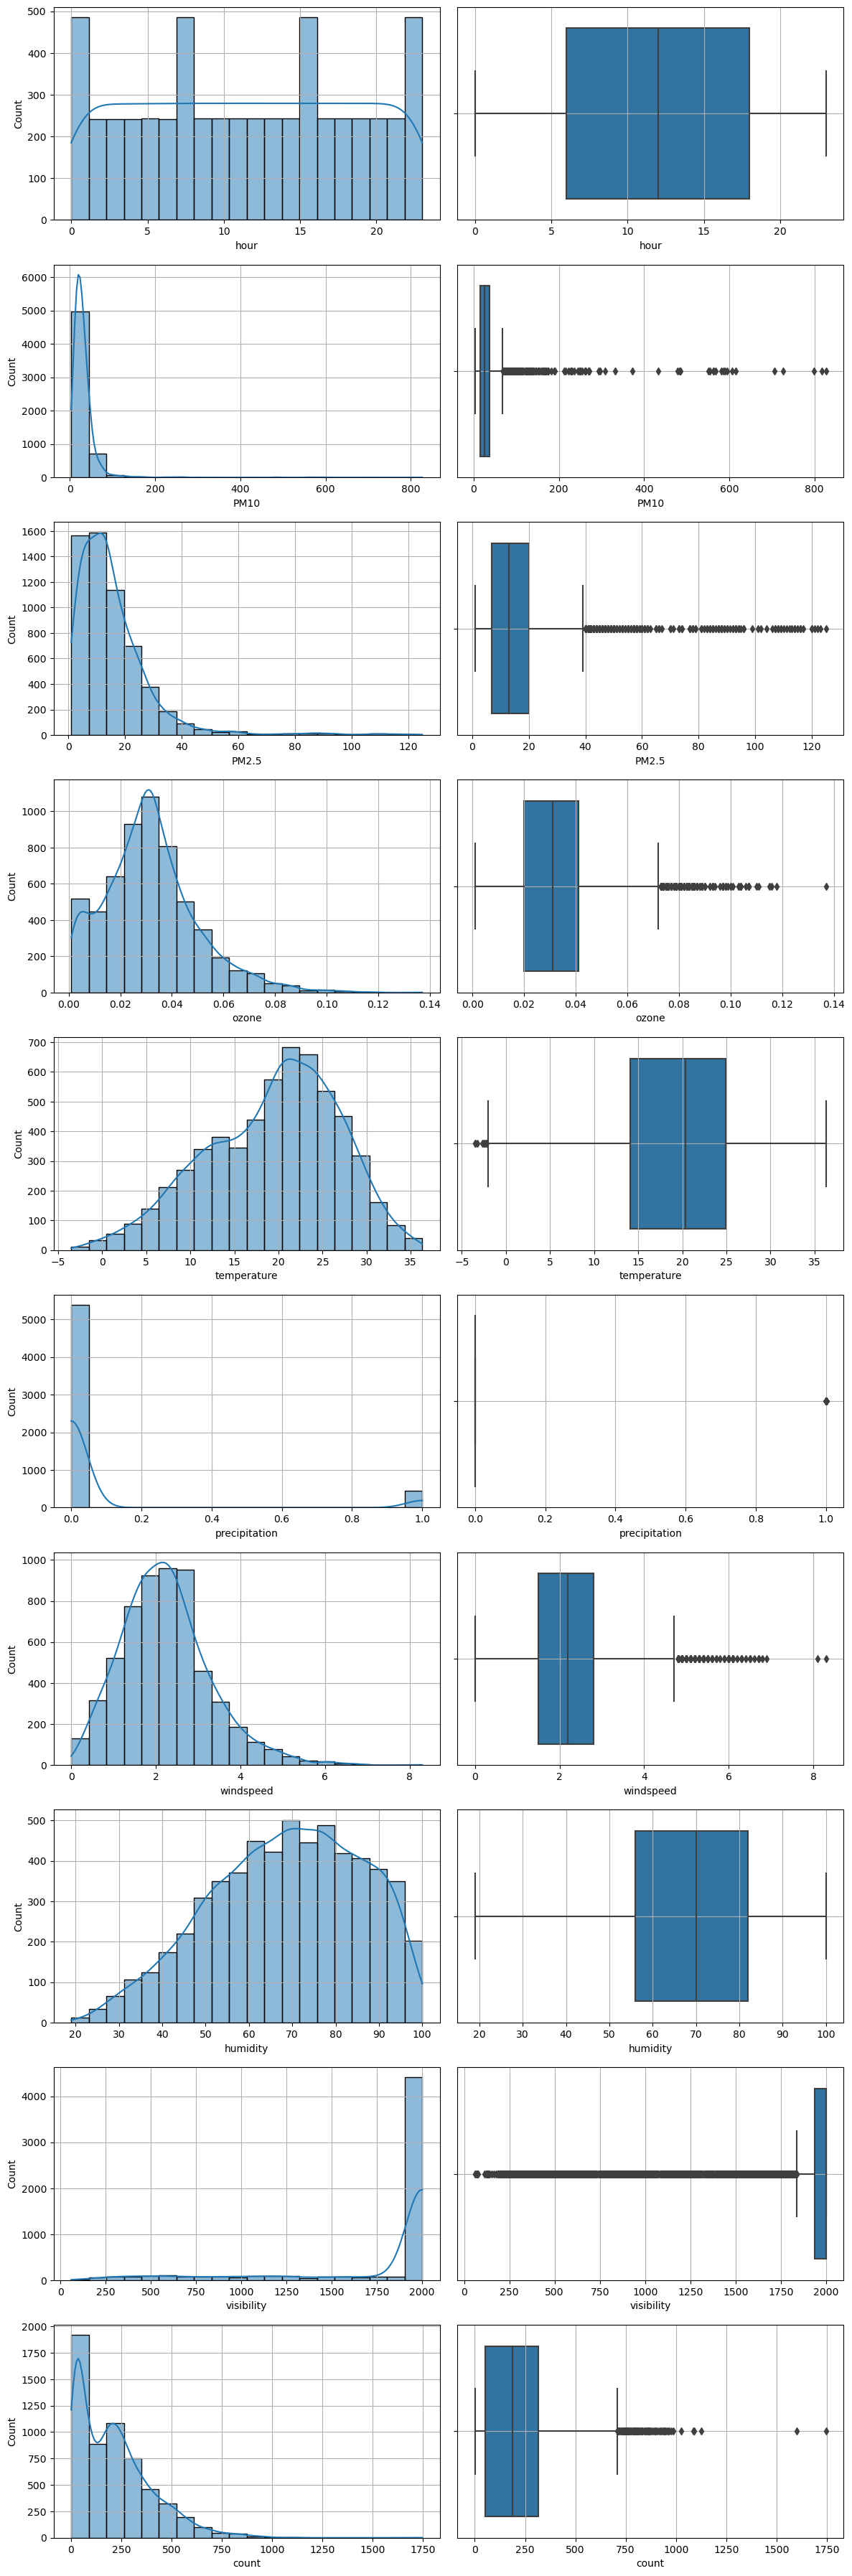

In [67]:
var_list = list(sbikedata)[1:11]
eda_1_num(sbikedata, var_list, bins = 20)

- 'hour': 22시~ 1시, 7시 ~ 8시, 15시~ 16시에서 이용 수가 다른 시간대에 비해서 많았다, 0시 및 일부 중간시간 데이터 비어있음
- 'PM10': 0 ~ 50 정도의 수치가 많았다 (대체로 공기질이 좋은 편이었다) -> 결측치 median으로 대체
- 'PM2.5': 0 ~ 20 정도의 수치가 많았다 (대체로 공기질이 좋은 편이었다) -> 결측치 median으로 대체
- 'ozone': 0 ~ 0.04 수치에 많이 분포 (환경 기준 이하로 오존의 농도도 낮은 편이었다) -> 결측치 median으로 대체
    - 오존은 기온 25도 이상, 상대습도 75% 이하, 풍속·초속 4m [참조 링크](https://m.science.ytn.co.kr/program/view.php?mcd=0082&key=202007141654519393)
- 'temperature': 10 ~ 15도, 20 ~ 25도에 많이 분포 (여름과 봄, 가을로 평균 기온 이상)
- 'precipitation': 비는 거의 오지 않았었다
- 'windspeed': 2 ~ 3m/s에 많이 분포 (바람도 적정한 수준으로 불었다)
- 'humidity': 60 ~ 80%에 많이 분포 (대체로 습하다 -> 데이터상 여름이 많았기 때문)
- 'visibility': 시정 20km에 많이 분포 (날씨가 좋은편이라 가시거리도 높은 편)
- 'count' (target): 시간당 0 ~ 250대의 수에 많이 분포 (생각보다는 많이 빌린다)

### 2) 범주형 변수 단변량 분석

In [46]:
sbikedata['date'].value_counts()

date
2021-08-01    24
2021-09-12    24
2021-08-31    24
2021-09-01    24
2021-09-02    24
              ..
2021-04-01    23
2021-05-21    23
2021-09-21    22
2021-04-30    22
2021-11-30     1
Name: count, Length: 244, dtype: int64

In [62]:
sbikedata['hour'].value_counts()

hour
1     243
14    243
23    243
22    243
21    243
20    243
19    243
18    243
17    243
16    243
15    243
13    243
12    243
11    243
10    243
9     243
8     243
7     243
5     243
0     243
2     242
6     242
3     242
4     241
Name: count, dtype: int64

In [63]:
sbikedata['month'].value_counts()

month
7     744
8     744
10    744
5     743
6     720
9     718
4     717
11    697
Name: count, dtype: int64

In [64]:
sbikedata['weekday'].value_counts()

weekday
5    840
6    840
0    840
3    839
4    837
2    816
1    815
Name: count, dtype: int64

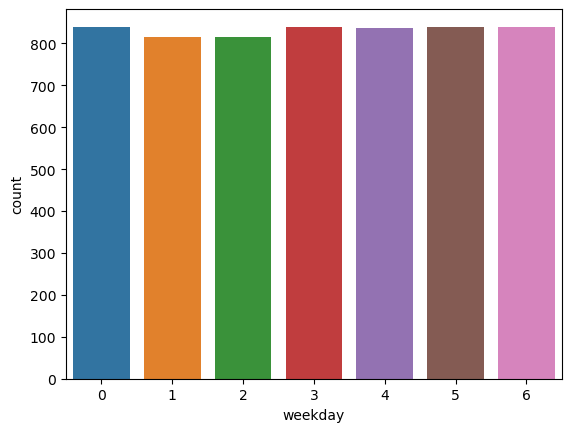

In [65]:
sns.countplot(x = 'weekday', data = sbikedata)
plt.show()

- 'date': 날짜별 데이터의 양 거의 동일

#### 1) Feature1 : hour

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 내포하고 있는 의미
- 시간을 24시로 표현

변수가 수치형인지 범주형인지
- 시간은 범주형? 수치형?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인
* kdeplot 활용

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리
- 데이터의 '시간' 열은 5827개 row로 구성되어있으며 결측치는 없음
- 0시 및 일부 중간시간대 데이터가 비어있음

#### 2) Feature2 : temperature

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 온도


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지
- 기온은 수치형? 범주형?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

위 정보로 부터 파악한 내용 정리


#### 3) Feature3 : precipitation

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 강우 여부 (비가 안왔으면 0, 왔으면 1)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지
- 1시간 전 강우 유무는 범주형? 수치형?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치 방안


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 4) Feature4 : windspeed

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 풍속, 풍량

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 5) Feature5 : humidity

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 습도

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 6) Feature6 : visibility

변수가 내포하고 있는 의미
- 대여 시점의 시계 (시정 거리)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 7) Feature7 : ozone

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 오존 수치

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



만약 결측치가 존재한다면?-> 어떻게 처리할 것인가?

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 8) Feature8 : PM10

변수가 내포하고 있는 의미
- 따릉이 대여 시점의 미세먼지 농도

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [1]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 9) Feature9 : PM2.5

변수가 내포하고 있는 의미
- 따릉이 대여시점의 초미세먼지 수치

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 결측치 존재 여부 및 조치방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리


#### 10) Count (Target)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 내포하고 있는 의미
- 따릉이의 대여량 -> 우리가 예측해야 할 변수!

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수가 수치형인지 범주형인지


변수의 결측치 존재 여부 및 조치 방안

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 기초 통계량 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



변수의 분포 확인

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.



위 정보로 부터 파악한 내용 정리
